# Machine Learning Foundation Nanodegree 2018-2019
## Project 2: Test a Perceptual Phenomenon (Descriptive Statistics)
#### Submission by: Aaron Balson Caroltin .J


### Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:brown">PURPLE</span>, <span style="color:green">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.



In [61]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [54]:
"""
Import dataset from stroopdata.csv
"""
data = pd.read_csv('stroopdata.csv')

#data.drop(['Diff'], axis=1)
data['Diff'] = data['Incongruent'] - data['Congruent']
print(data)

    Congruent  Incongruent    Diff
0      12.079       19.278   7.199
1      16.791       18.741   1.950
2       9.564       21.214  11.650
3       8.630       15.687   7.057
4      14.669       22.803   8.134
5      12.238       20.878   8.640
6      14.692       24.572   9.880
7       8.987       17.394   8.407
8       9.401       20.762  11.361
9      14.480       26.282  11.802
10     22.328       24.524   2.196
11     15.298       18.644   3.346
12     15.073       17.510   2.437
13     16.929       20.330   3.401
14     18.200       35.255  17.055
15     12.130       22.158  10.028
16     18.495       25.139   6.644
17     10.639       20.429   9.790
18     11.344       17.425   6.081
19     12.369       34.288  21.919
20     12.944       23.894  10.950
21     14.233       17.960   3.727
22     19.710       22.058   2.348
23     16.004       21.157   5.153


**Question 1:** What is our independent variable? What is our dependent variable?

**Answer:** In experiments, we vary independent variable(s) under controlled environment and observe for changes imparted on dependent variable. 
1. In our experiment, for each subject, the dependant variable is the response time recorded in seconds, 
2. while the independant variable is the congruent or incongruent state of the word being read.

**Question 2:** What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Answer:** 

1. Null Hypothsis (H0) - We will start with assumption that there won't be any Stroop effect noticed (in terms of difference in time) while reading congruent or incongruent words.

    Alternate Hypothesis(H1) - There will be time difference noticed between both reading tasks with incongruent words possibly taking longer than congruent words.

    > H0: μ<sub>i</sub> approx equals μ<sub>c</sub><br/>
    > H1: μ<sub>i</sub> greater (or lesser) than μ<sub>c</sub><br/>
    > Where μ<sub>i</sub> = sample mean of incongruent values and μ<sub>c</sub> = sample mean of congruent values

2. By using the same subject twice to perform both reading tasks, we eliminate the individual skill differences between subjects. The two-tailed t-test is also helpful to suggest if the Scroop effect has greater (or lesser) impact on the response time.

3. Since the dataset is below 30 samples and we don't know either the population mean or SD, we are picking t-test over z-test. Also, as we require to compare the means of the same two groups, with readings not in normal distribution and with few outliers, our choice is to use two-tailed t-test.

**Question 3:** Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability

**Answer:** 
1. Some descriptive stats as below
2. Included central tendency (mean)
3. Included measure of variability (std)

Considerable difference between µ-Congruent and µ-InCongruent is implying to reject the H0 and confirming Stroop effect.

In [55]:
# removing null values to avoid errors  
data.dropna(inplace = True)

# percentile list (50% is Median)
perc =[.20, .40, .50, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 

data.describe(percentiles = perc, include = include)


,Congruent,Incongruent,Diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
20%,11.062000,18.370400,3.379000
40%,12.484000,20.495600,6.726600
50%,14.356500,21.017500,7.666500
60%,14.687400,21.889200,8.593400
80%,16.846200,24.543200,11.114400
max,22.328000,35.255000,21.919000


**Question 4:** Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Answer:**


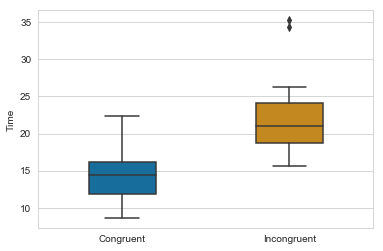

In [56]:
# Boxplot to compare range, median, quartile between two groups
sns.set_style("whitegrid")
sns.boxplot(data=data[['Congruent', 'Incongruent']], orient="v",width=0.4, palette="colorblind");
plt.ylabel("Time");

Observance: The Range and Median of both groups clearly suggest, the response time of both group are different. Also, the Congruent group has lower quartile range (8 - 22) while Incongruent group has higher (15 - 26) with couple of outliers at 34,35 not helping the case for H0.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


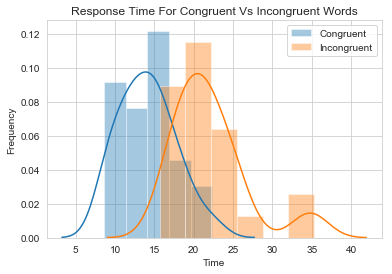

In [57]:
# Distribution frequency comparision for Response time
sns.distplot(data['Congruent'],label = "Congruent")
sns.distplot(data['Incongruent'],label = "Incongruent")
plt.xlabel("Time");
plt.ylabel("Frequency");
plt.title("Response Time For Congruent Vs Incongruent Words");
plt.legend();

Observance: The response time curves are nearly parallel with a shift right (from Congruent to Incongruent), hence supporting case for H1. It seems everyone who performed well in Congruent test has taken more time at InCongruent test.

**Question:5** Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Answer:**


In [67]:
# Perform t-test
std_err_diff = data.Diff.std() / ( data.shape[0]**0.5 )
t_stat = data.Diff.mean() / std_err_diff

#t-critical value for a 95% confidence level and 23 d.f.
t_crit = t.ppf(.95, 23)

print('T-statistics =', t_stat)
print('T-critical =', t_crit)
print('P-value =', 1-stats.t.cdf(t_stat, data.shape[0]-1))

T-statistics = 8.020706944109957
T-critical = 1.7138715277470473
P-value = 2.0515002918664038e-08


For Significance level = 0.05, Confidence level = 1-0.05 = 0.95 (95%)</br>
This is the probability of rejecting H0 when it is true.</br>

For degree of freedom: 24-1=23, T-statistics = 8.0207 relates to P-value of 2.05152-08  and T-critical of 1.713</br>
P-value is strength of evidence to support H0 but it is less than 0.05</br>

Also T-stat > T-crit so we will reject H0 (and accept H1)


**Optional Question 6:** What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer:** Stroop effect in action. It is observed though, in children, it is less effective probably because they are good at reading colors than text. Nature of our brain is such that it tries to infer as such details from limited time/source. When eye sees the color, brain instinctly tries to find more details so it reads out text as well. Using last-in, first-out phenomenon, when it tries to say aloud, lastly inference (text) comes out naturally unless controlled. Hence the additional processing time required by brain for Incongruent words. 

I have played similar alternative games in lumosity where the player has to constrain himself from clicking on wrong options which pop on screen at face pace (eg: should left click on it when seeing any even number or vowel letter but right click otherwise).

**References**

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/

https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

https://seaborn.pydata.org/

https://docs.scipy.org/doc/scipy/reference/stats.html

https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg

http://science.sciencemag.org/content/204/4400/1402.1
